First Import some important libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

now loading the both csv files

In [6]:
df_app = pd.read_csv('/applicant.csv')
df_ln = pd.read_csv('/loan.csv')

First take a look for both csv 

In [7]:
df_app.head(3)

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN


In [8]:
df_ln.head(3)

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0


In [9]:
print(df_app.shape,df_ln.shape)

(1000, 15) (1000, 13)


In [10]:
df_app.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)'],
      dtype='object')

In [11]:
df_ln.columns

Index(['loan_application_id', 'applicant_id', 'Months_loan_taken_for',
       'Purpose', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Property',
       'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

check for the diff columns

In [12]:
len(list(set(df_app.columns) - set(df_ln.columns)))

14

check applicant_id is same for both or not

In [13]:
list(set(df_app.applicant_id) - set(df_ln.applicant_id))

[]

Here we can clearly see there is no diff in applicant_id so we can merge both csv in one which help us to get better result in model building or less computation.

In [14]:
df_final = pd.merge(df_app, df_ln ,on='applicant_id',  how='left')

In [15]:
df_final.head(2)

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),loan_application_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0,d68d975e-edad-11ea-8761-1d6f9c1ff461,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac,d68d989e-edad-11ea-b1d5-2bcf65006448,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1


Now take some initial info

In [16]:
df_final.shape

(1000, 27)

In [17]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [18]:
df_final.describe()

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,35.546000,1.155000,2.845000,0.963000,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,2.286764e+05,11.375469,0.362086,1.103718,0.188856,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,1.105364e+06,19.000000,1.000000,1.000000,0.000000,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.321398e+06,27.000000,1.000000,2.000000,1.000000,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,1.529114e+06,33.000000,1.000000,3.000000,1.000000,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,1.707752e+06,42.000000,1.000000,4.000000,1.000000,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,1.903505e+06,75.000000,2.000000,4.000000,1.000000,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


In [19]:
df_final.isnull().sum()

applicant_id                                                  0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
loan_application_id                     

In [20]:
bool_col = df_final.select_dtypes(include=['bool']).columns.tolist()
num_col = df_final.select_dtypes(exclude=['object','bool']).columns.tolist()
cat_col = df_final.select_dtypes(include=['object']).columns.tolist()

In [21]:
print(len(bool_col),len(num_col),len(cat_col))

0 12 15


we can see there is lots of null value. First we check these columns are imp for prediction or not then we fix it on FE part.

In [22]:
df_final.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
       'loan_application_id', 'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Property', 'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

EDA

first check distribution of dependent variable

Text(0.5, 1.0, 'high_risk_applicant')

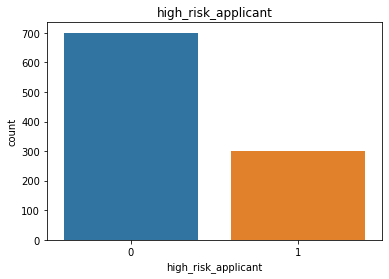

In [23]:
sns.countplot(df_final["high_risk_applicant"])
plt.title("high_risk_applicant")

dependent variable is not equaly distributed so for better performance we can use over or under sampling

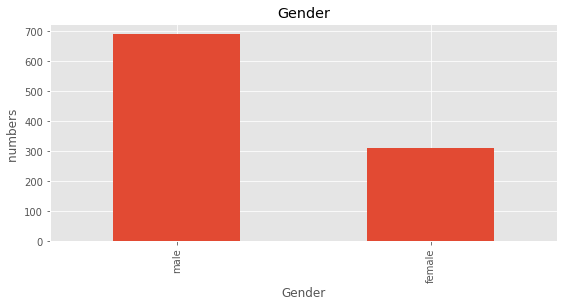

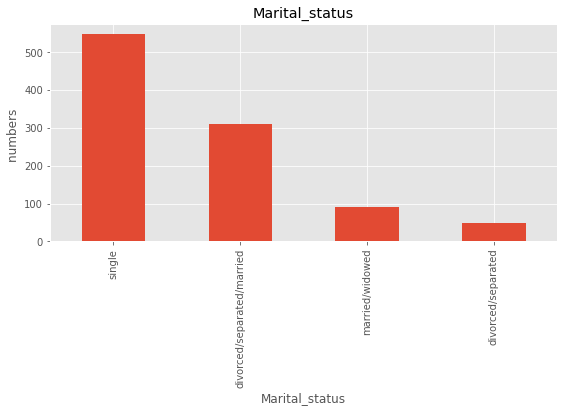

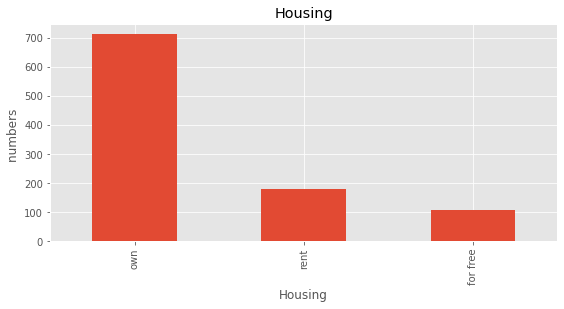

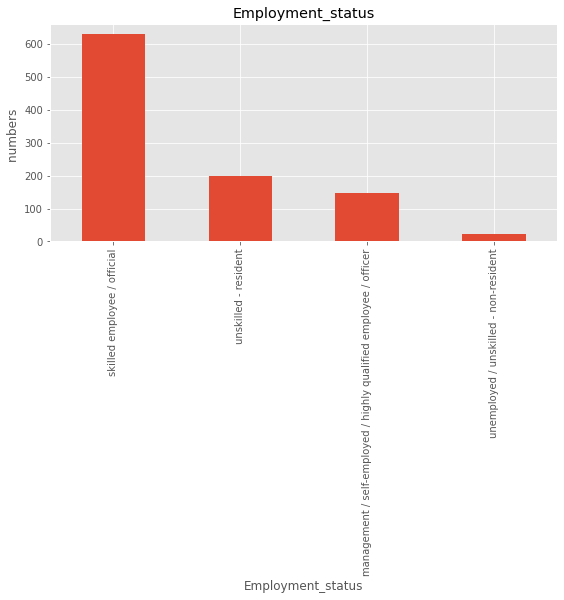

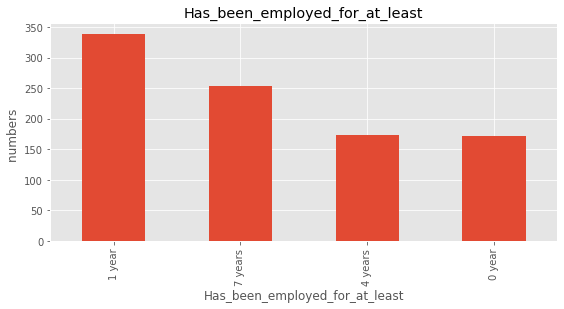

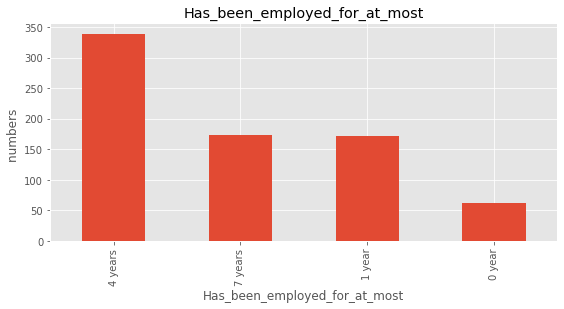

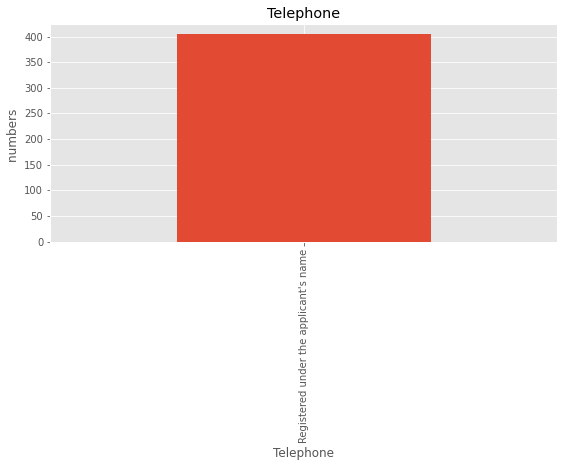

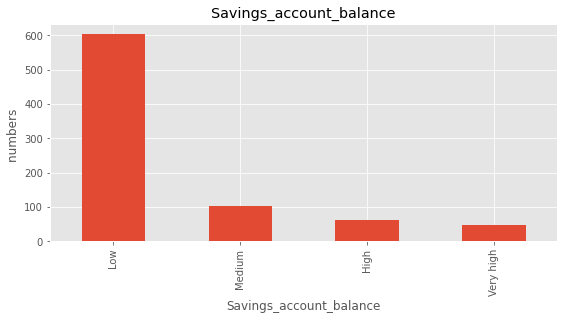

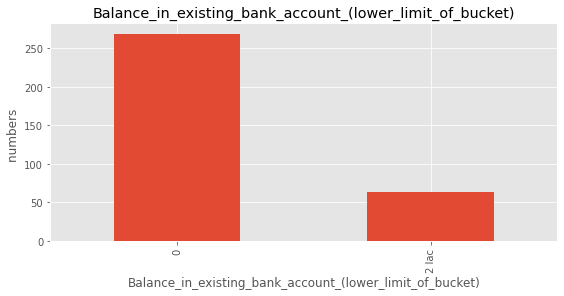

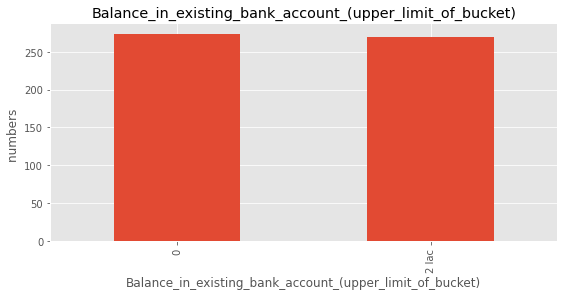

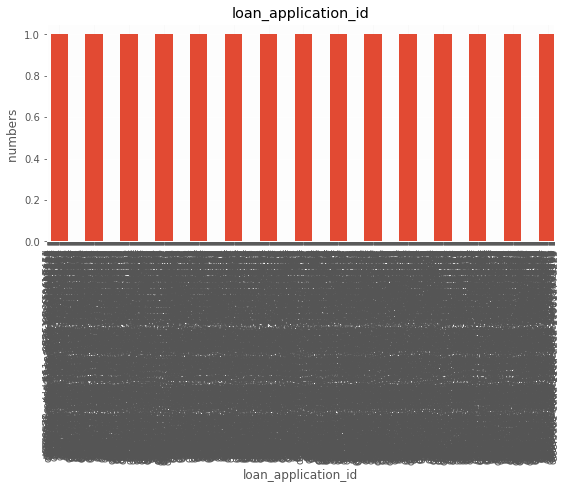

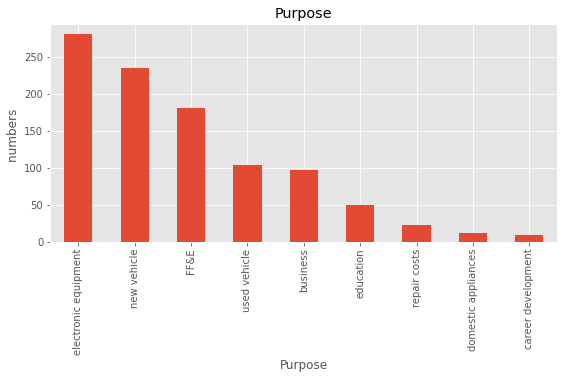

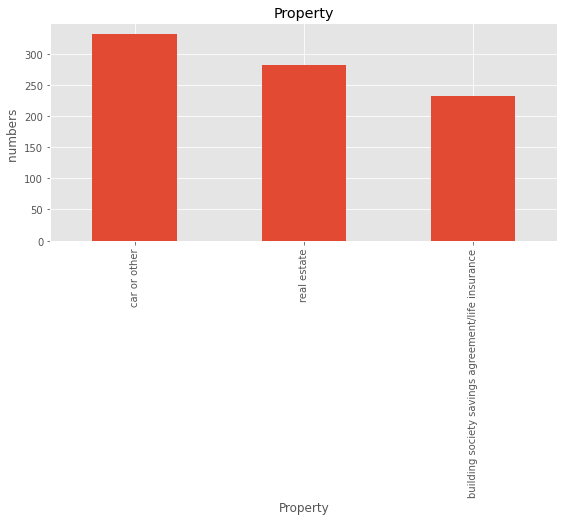

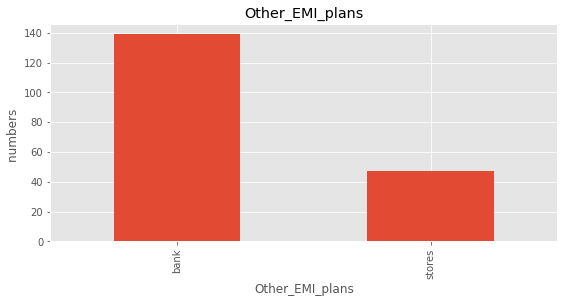

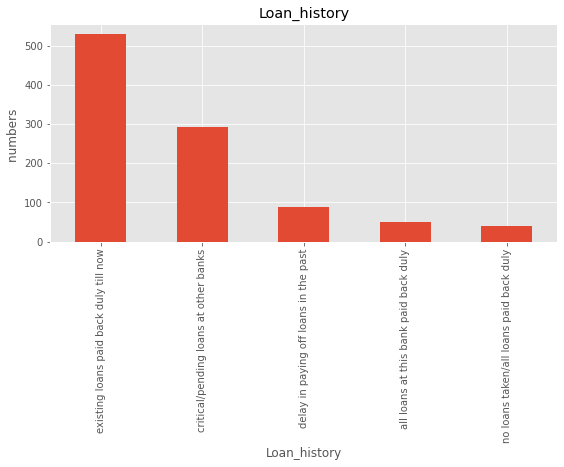

In [24]:
# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df_final[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("numbers ")
    plt.title(column)

plotting histogram for each numerical variable

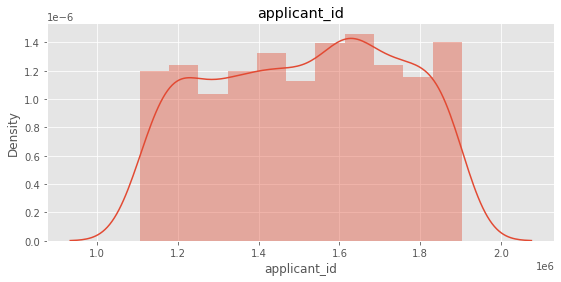

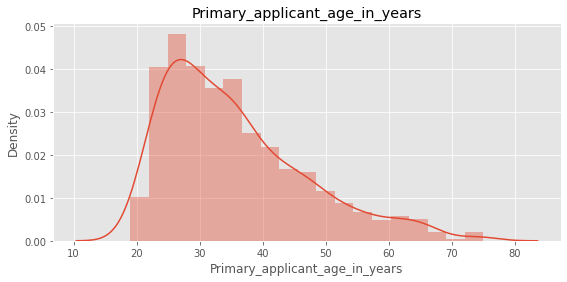

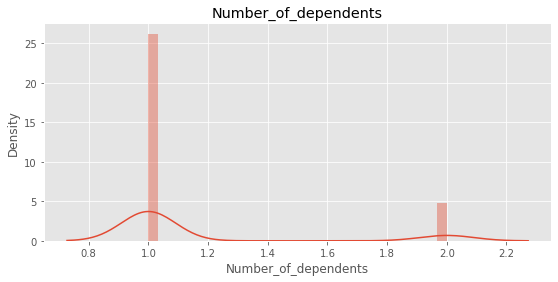

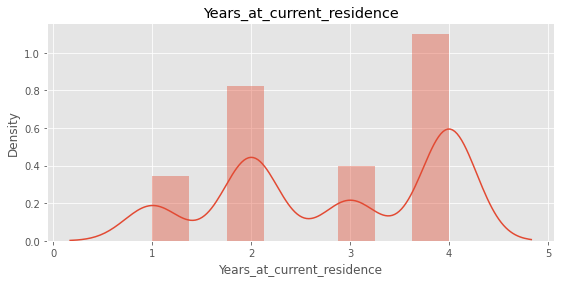

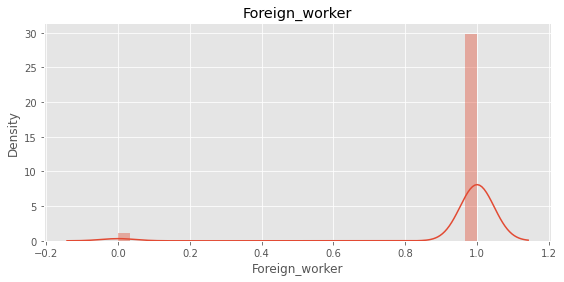

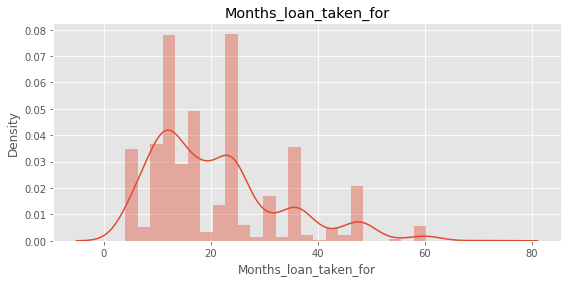

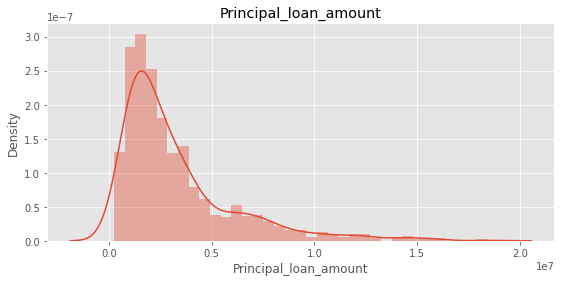

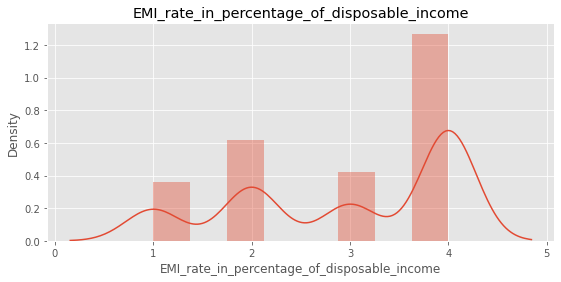

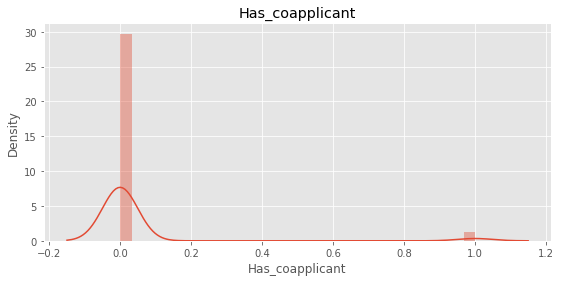

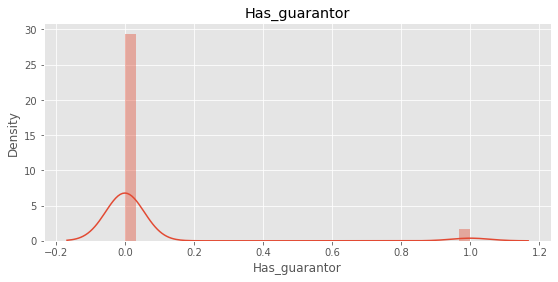

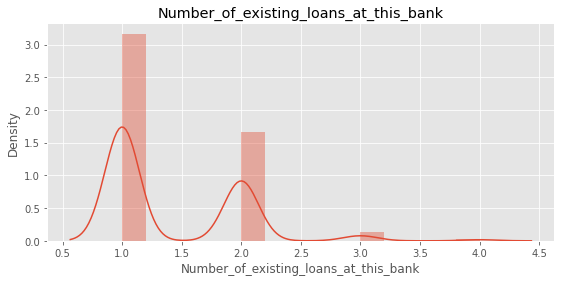

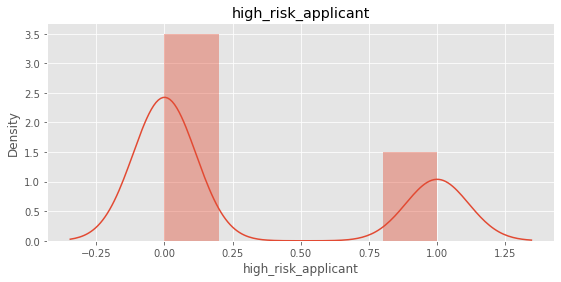

In [25]:
plt.style.use("ggplot")
for column in num_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(df_final[column], kde=True)
    plt.title(column)

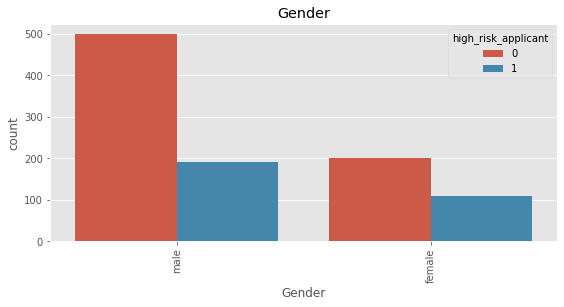

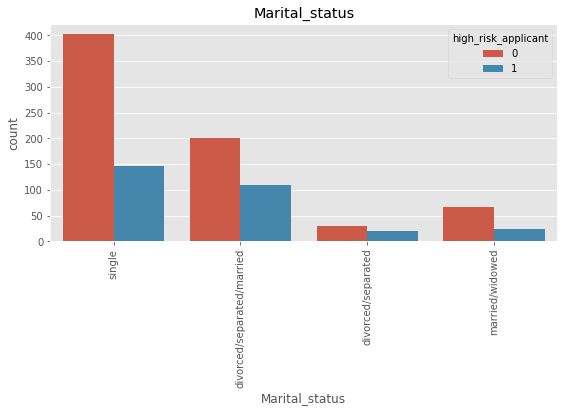

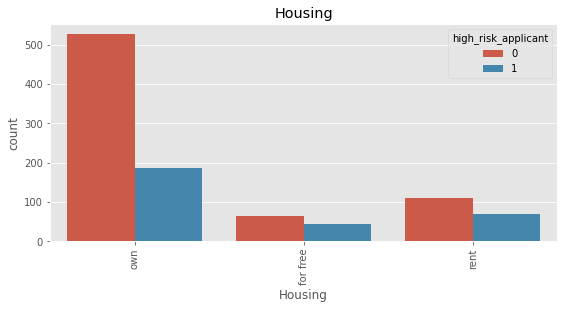

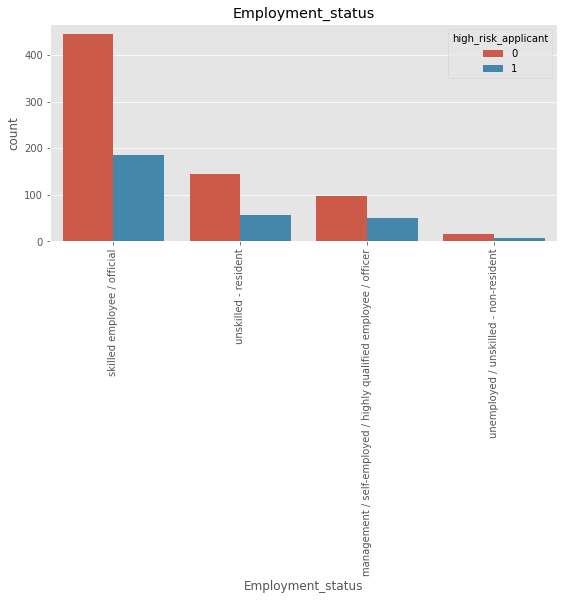

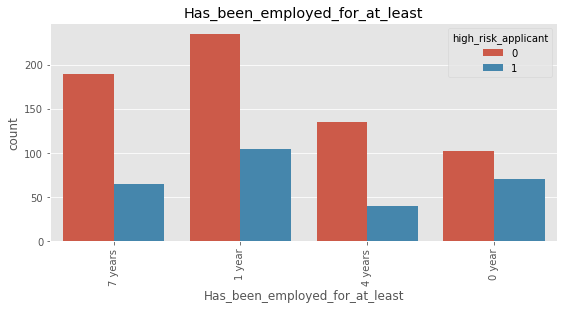

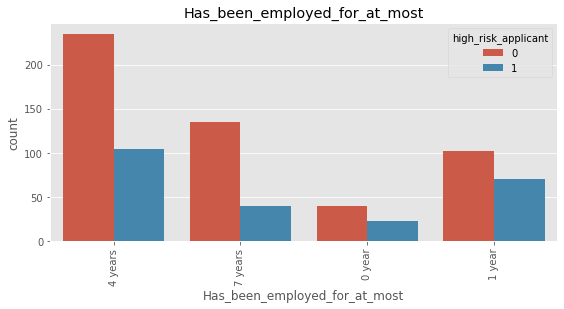

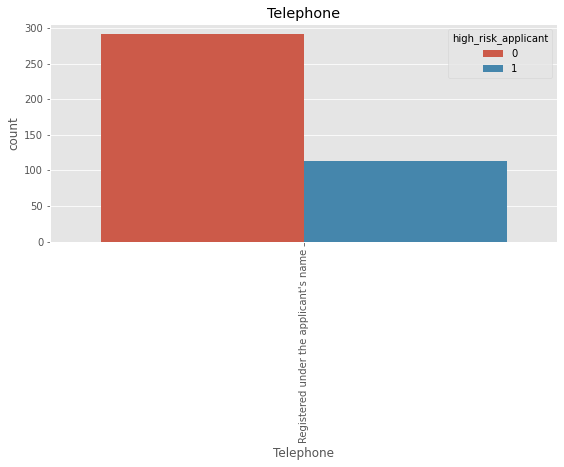

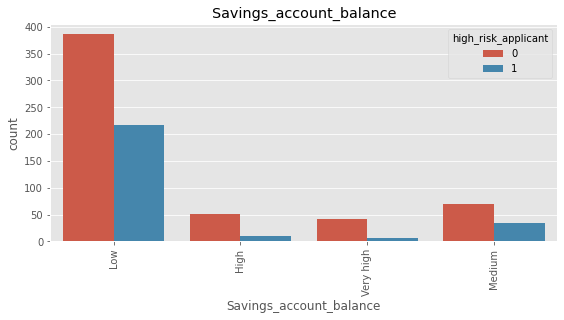

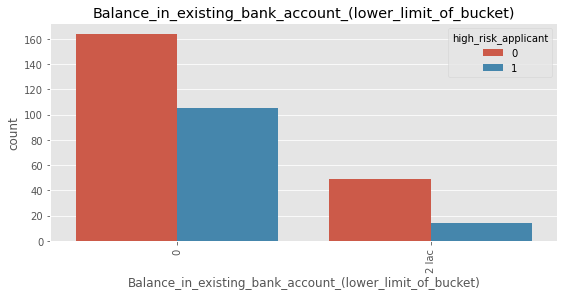

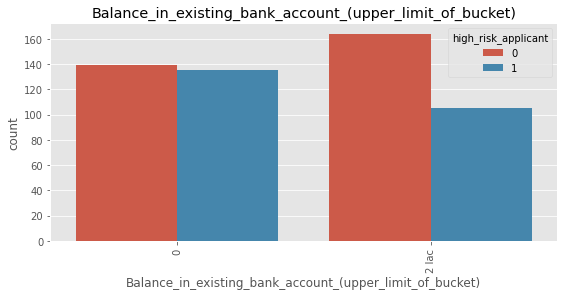

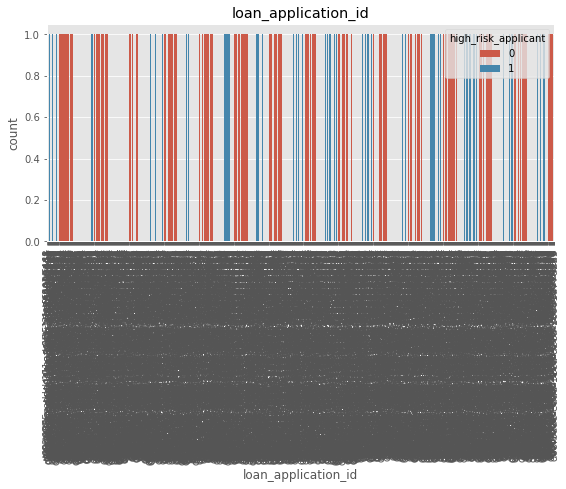

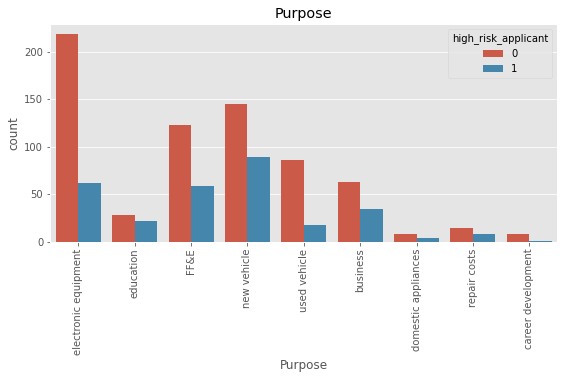

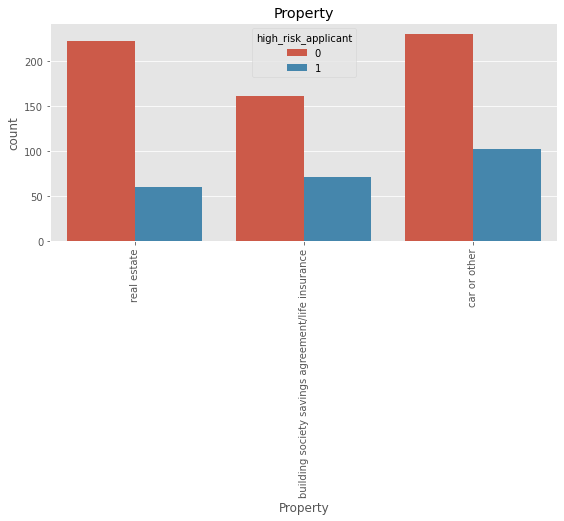

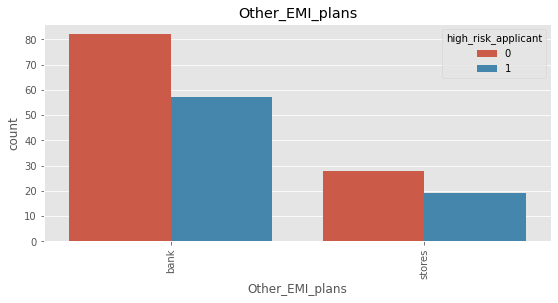

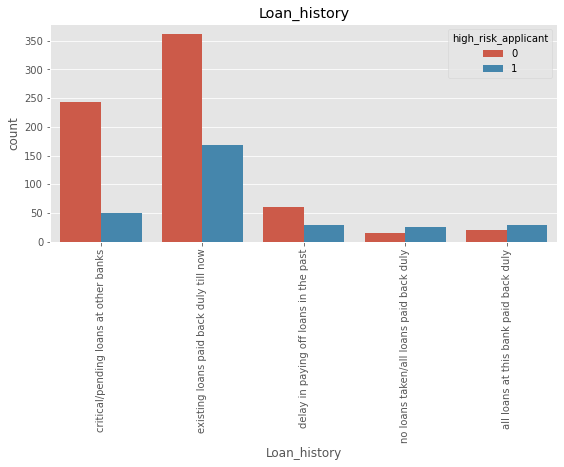

In [26]:
plt.style.use("ggplot")
for column in cat_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(df_final[column], hue=df_final["high_risk_applicant"])
    plt.title(column)    
    plt.xticks(rotation=90)

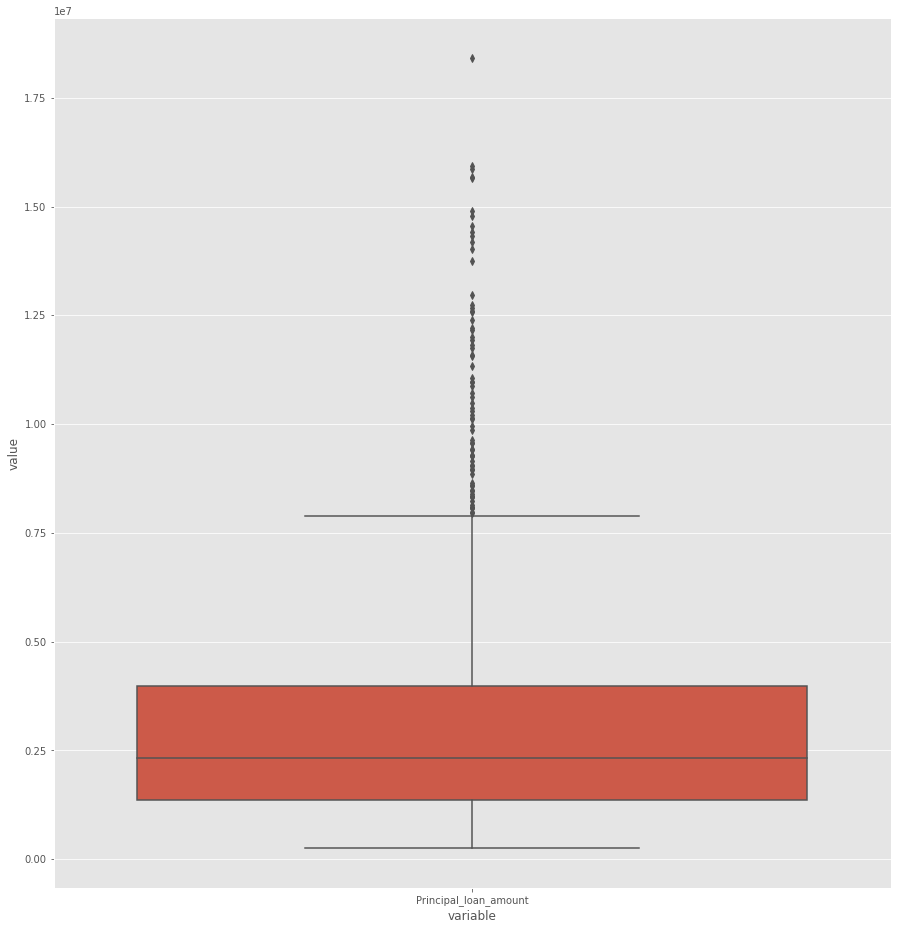

In [27]:
df = pd.DataFrame(data=df_final, columns=['Principal_loan_amount'])
plt.figure(figsize=(15,16))
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

Let's try to see which products they want to buy according to their ages and their quantities.

Values describe: 
high_risk_applicant     0   1
Purpose                      
FF&E                  123  58
business               63  34
career development      8   1
domestic appliances     8   4
education              28  22
electronic equipment  218  62
new vehicle           145  89
repair costs           14   8
used vehicle           86  17


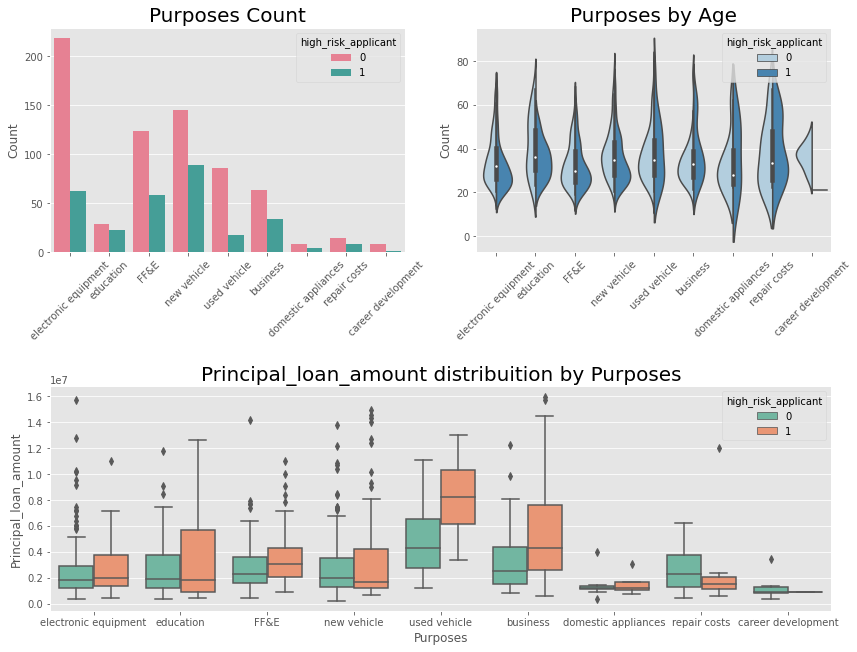

In [28]:
print("Values describe: ")
print(pd.crosstab(df_final.Purpose, df_final.high_risk_applicant))

plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="Purpose", data=df_final, 
              palette="husl", hue = "high_risk_applicant")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="Purpose", y="Primary_applicant_age_in_years", data=df_final, palette="Blues", hue = "high_risk_applicant",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
g2 = sns.boxplot(x="Purpose", y="Principal_loan_amount", data=df_final, 
               palette="Set2", hue = "high_risk_applicant")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Principal_loan_amount", fontsize=12)
g2.set_title("Principal_loan_amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

In [29]:
df_0 = df_final[df_final["high_risk_applicant"]==0]
df_1 = df_final[df_final["high_risk_applicant"]==1]

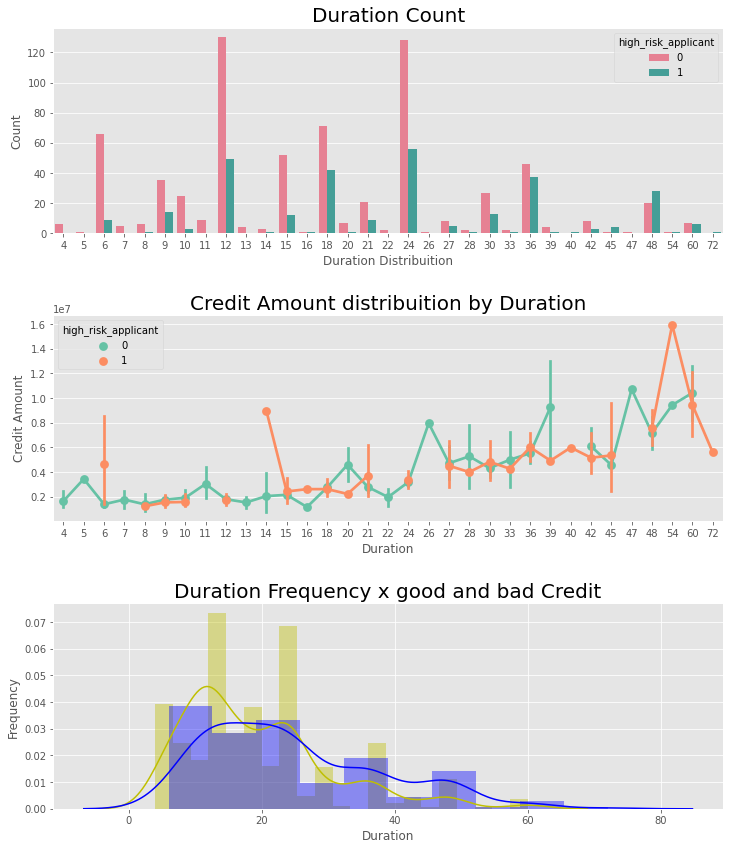

In [33]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="Months_loan_taken_for", data=df_final, 
              palette="husl",  hue = "high_risk_applicant")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="Months_loan_taken_for", y ="Principal_loan_amount",data=df_final,
                   hue="high_risk_applicant", palette="Set2")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(df_0["Months_loan_taken_for"], color='y')
g2 = sns.distplot(df_1["Months_loan_taken_for"], color='b')
g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency x good and bad Credit", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

Total values of the most missing variable: 
Savings_account_balance
High          63
Low          603
Medium       103
Very high     48
Name: Savings_account_balance, dtype: int64


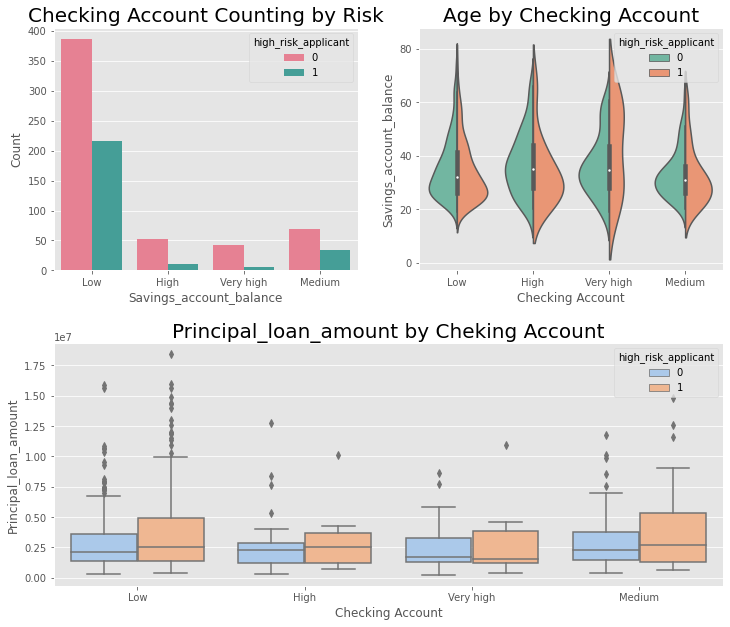

In [34]:
print("Total values of the most missing variable: ")
print(df_final.groupby("Savings_account_balance")["Savings_account_balance"].count())

plt.figure(figsize = (12,10))

g = plt.subplot(221)
g = sns.countplot(x="Savings_account_balance", data=df_final, 
              palette="husl", hue="high_risk_applicant")
g.set_xlabel("Savings_account_balance", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Checking Account Counting by Risk", fontsize=20)

g1 = plt.subplot(222)
g1 = sns.violinplot(x="Savings_account_balance", y="Primary_applicant_age_in_years", data=df_final, palette="Set2", hue = "high_risk_applicant",split=True)
g1.set_xlabel("Checking Account", fontsize=12)
g1.set_ylabel("Savings_account_balance", fontsize=12)
g1.set_title("Age by Checking Account", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="Savings_account_balance",y="Principal_loan_amount", data=df_final,hue='high_risk_applicant',palette="pastel")
g2.set_xlabel("Checking Account", fontsize=12)
g2.set_ylabel("Principal_loan_amount", fontsize=12)
g2.set_title("Principal_loan_amount by Cheking Account", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)

plt.show()
plt.show()

Then look at the correlations between target and independent variables.



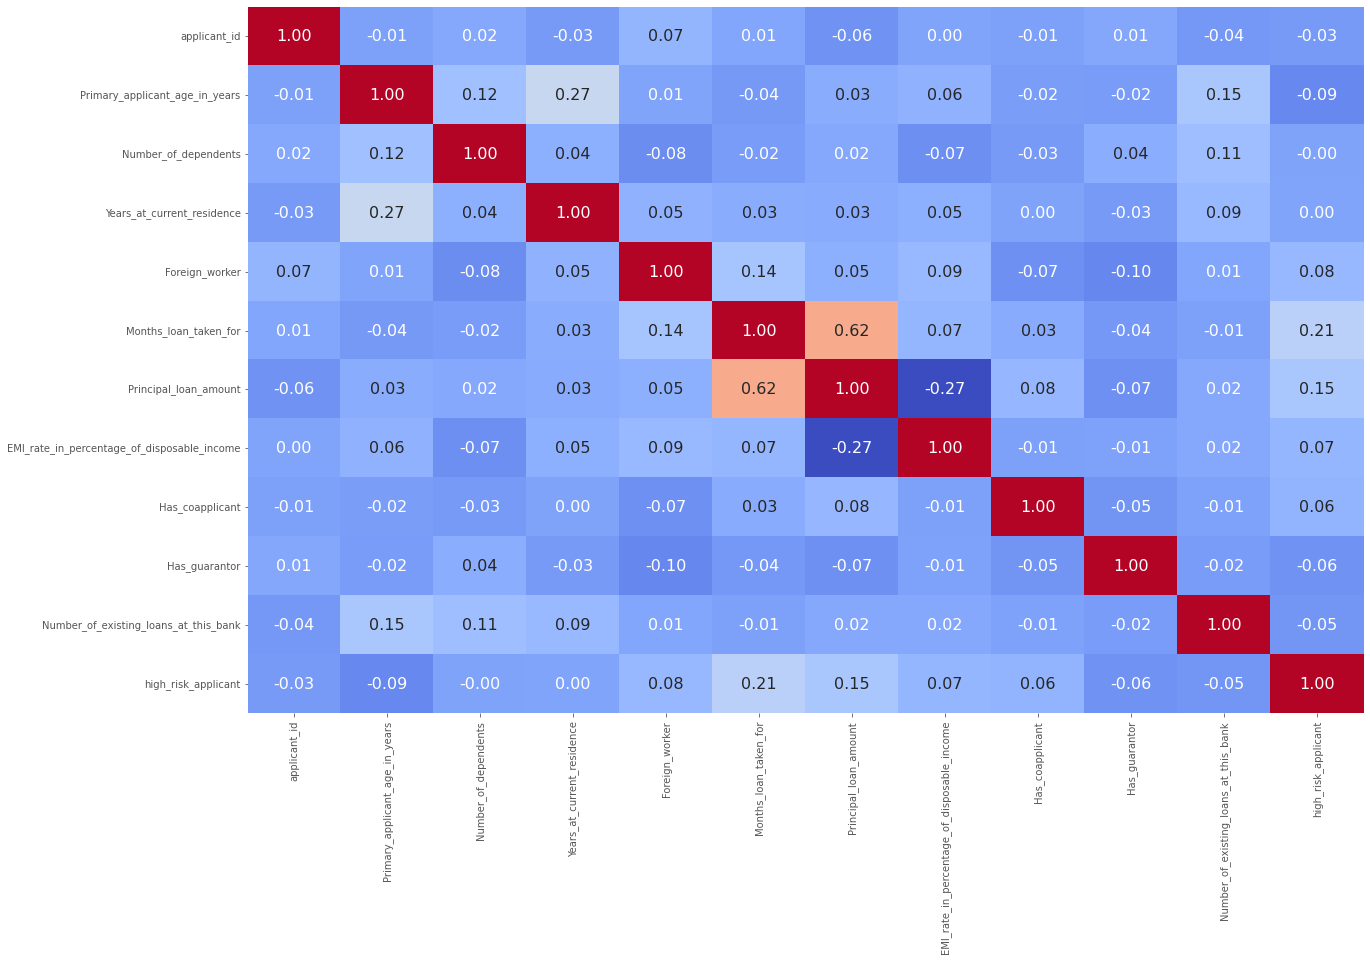

In [35]:
plt.figure(figsize=(20,13))
sns.heatmap(df_final.corr(),
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            annot_kws={'size':16},
            cbar=False)

Data Prepcoressing & Feature Engineering

First re-name the columns 

In [118]:
#Because we are modifying the df_final
df = df_final.copy()

In [119]:
df.columns.to_list()

['applicant_id',
 'Primary_applicant_age_in_years',
 'Gender',
 'Marital_status',
 'Number_of_dependents',
 'Housing',
 'Years_at_current_residence',
 'Employment_status',
 'Has_been_employed_for_at_least',
 'Has_been_employed_for_at_most',
 'Telephone',
 'Foreign_worker',
 'Savings_account_balance',
 'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
 'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
 'loan_application_id',
 'Months_loan_taken_for',
 'Purpose',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income',
 'Property',
 'Has_coapplicant',
 'Has_guarantor',
 'Other_EMI_plans',
 'Number_of_existing_loans_at_this_bank',
 'Loan_history',
 'high_risk_applicant']

In [120]:
df.head(2)

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),loan_application_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0,d68d975e-edad-11ea-8761-1d6f9c1ff461,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac,d68d989e-edad-11ea-b1d5-2bcf65006448,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1


In [121]:
col_dict = {
 'applicant_id' : 'id',
 'Primary_applicant_age_in_years' : 'age',
 'Number_of_dependents' :'dependents',
 'Years_at_current_residence' : 'residence_yr',
 'Has_been_employed_for_at_least': 'working_yr',
 'Has_been_employed_for_at_most' : 'experirnce',
 'Savings_account_balance' : 'ac_bal',
 'Balance_in_existing_bank_account_(lower_limit_of_bucket)' : 'low_bal',
 'Balance_in_existing_bank_account_(upper_limit_of_bucket)' : 'high_bal',
 'Months_loan_taken_for' : 'period',
 'Principal_loan_amount' : 'main_amt',
 'EMI_rate_in_percentage_of_disposable_income' : 'rate',
 'Has_coapplicant' : 'coapplicant',
 'Has_guarantor' : 'guarantor',
 'Other_EMI_plans' : 'emi',
 'Number_of_existing_loans_at_this_bank' : 'total_loan',
 'high_risk_applicant' : 'risk'
}
df.rename(columns = col_dict, inplace = True)

In [122]:
print(df.shape)
df.columns

(1000, 27)


Index(['id', 'age', 'Gender', 'Marital_status', 'dependents', 'Housing',
       'residence_yr', 'Employment_status', 'working_yr', 'experirnce',
       'Telephone', 'Foreign_worker', 'ac_bal', 'low_bal', 'high_bal',
       'loan_application_id', 'period', 'Purpose', 'main_amt', 'rate',
       'Property', 'coapplicant', 'guarantor', 'emi', 'total_loan',
       'Loan_history', 'risk'],
      dtype='object')

In [123]:
df.isnull().sum()

id                       0
age                      0
Gender                   0
Marital_status           0
dependents               0
Housing                  0
residence_yr             0
Employment_status        0
working_yr              62
experirnce             253
Telephone              596
Foreign_worker           0
ac_bal                 183
low_bal                668
high_bal               457
loan_application_id      0
period                   0
Purpose                 12
main_amt                 0
rate                     0
Property               154
coapplicant              0
guarantor                0
emi                    814
total_loan               0
Loan_history             0
risk                     0
dtype: int64

columns which are not importent which shows in above graph or also contains null

In [124]:
df.drop(columns = ['id','emi','high_bal','low_bal','guarantor','coapplicant','Foreign_worker','dependents','Telephone','loan_application_id'],inplace=True,errors = 'ignore')

In [125]:
df.head(2)

,age,Gender,Marital_status,Housing,residence_yr,Employment_status,working_yr,experirnce,ac_bal,period,Purpose,main_amt,rate,Property,total_loan,Loan_history,risk
0,67,male,single,own,4,skilled employee / official,7 years,NaN,NaN,6,electronic equipment,1169000,4,real estate,2,critical/pending loans at other banks,0
1,22,female,divorced/separated/married,own,2,skilled employee / official,1 year,4 years,Low,48,electronic equipment,5951000,2,real estate,1,existing loans paid back duly till now,1


In [126]:
df.isnull().sum()

age                    0
Gender                 0
Marital_status         0
Housing                0
residence_yr           0
Employment_status      0
working_yr            62
experirnce           253
ac_bal               183
period                 0
Purpose               12
main_amt               0
rate                   0
Property             154
total_loan             0
Loan_history           0
risk                   0
dtype: int64

In [127]:
#Filling missing values with mode
df["ac_bal"]= df["ac_bal"].fillna(df['ac_bal'].mode()[0])
df['working_yr'] = df['working_yr'].fillna(0)
df['experirnce'] = df['experirnce'].fillna(0)
df['Purpose'] = df['Purpose'].fillna('None')
df['Property'] = df['Property'].fillna('None')

In [128]:
df.isna().sum()

age                  0
Gender               0
Marital_status       0
Housing              0
residence_yr         0
Employment_status    0
working_yr           0
experirnce           0
ac_bal               0
period               0
Purpose              0
main_amt             0
rate                 0
Property             0
total_loan           0
Loan_history         0
risk                 0
dtype: int64

Now working with cat data

In [129]:
df.dtypes

age                   int64
Gender               object
Marital_status       object
Housing              object
residence_yr          int64
Employment_status    object
working_yr           object
experirnce           object
ac_bal               object
period                int64
Purpose              object
main_amt              int64
rate                  int64
Property             object
total_loan            int64
Loan_history         object
risk                  int64
dtype: object

In [130]:
df_cat_col = ['Gender',
 'Marital_status',
 'Housing',
 'Employment_status',
 'Purpose',
 'Property',
 'ac_bal',
 'Loan_history']

In [131]:
df['working_yr'].unique()

array(['7 years', '1 year', '4 years', 0, '0 year'], dtype=object)

In [132]:
df['working_yr'] = df['working_yr'].map({'0 year':0,'1 year':1,'4 years':4,'7 years':7,})

In [133]:
df['experirnce'].unique()

array([0, '4 years', '7 years', '0 year', '1 year'], dtype=object)

In [134]:
df['experirnce'] = df['experirnce'].map({'0 year':0,'1 year':1,'4 years':4,'7 years':7,})

In [135]:
df_num_col = ['age',
 'residence_yr',
 'working_yr',
 'experirnce',
 'period',
 'main_amt',
 'rate',
 'total_loan',
 'risk']

In [136]:
#Categorical Columns
df = pd.get_dummies(df,columns=df_cat_col)

#Numeric Columns
for col in set(df.columns).intersection(df_num_col):
     df[col] = df[col].astype('float') 

In [137]:
df = df.reset_index(drop=True)

In [138]:
df.head(2)

,age,residence_yr,working_yr,experirnce,period,main_amt,rate,total_loan,risk,Gender_female,Gender_male,Marital_status_divorced/separated,Marital_status_divorced/separated/married,Marital_status_married/widowed,Marital_status_single,Housing_for free,Housing_own,Housing_rent,Employment_status_management / self-employed / highly qualified employee / officer,Employment_status_skilled employee / official,Employment_status_unemployed / unskilled - non-resident,Employment_status_unskilled - resident,Purpose_FF&E,Purpose_None,Purpose_business,Purpose_career development,Purpose_domestic appliances,Purpose_education,Purpose_electronic equipment,Purpose_new vehicle,Purpose_repair costs,Purpose_used vehicle,Property_None,Property_building society savings agreement/life insurance,Property_car or other,Property_real estate,ac_bal_High,ac_bal_Low,ac_bal_Medium,ac_bal_Very high,Loan_history_all loans at this bank paid back duly,Loan_history_critical/pending loans at other banks,Loan_history_delay in paying off loans in the past,Loan_history_existing loans paid back duly till now,Loan_history_no loans taken/all loans paid back duly
0,67.0,4.0,7.0,NaN,6.0,1169000.0,4.0,2.0,0.0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
1,22.0,2.0,1.0,4.0,48.0,5951000.0,2.0,1.0,1.0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0


In [140]:
df = df.fillna(0)
df.isna().sum()

age                                                                                   0
residence_yr                                                                          0
working_yr                                                                            0
experirnce                                                                            0
period                                                                                0
main_amt                                                                              0
rate                                                                                  0
total_loan                                                                            0
risk                                                                                  0
Gender_female                                                                         0
Gender_male                                                                           0
Marital_status_divorced/separate

In [141]:
df.shape

(1000, 45)

take out 10% data for validation

model building part start

In [142]:
#take out val data
from sklearn.model_selection import train_test_split
use, val = train_test_split(df, test_size=0.1)

In [143]:
print(use.shape,val.shape)
print(use.risk.value_counts(),val.risk.value_counts())

(900, 45) (100, 45)
0.0    634
1.0    266
Name: risk, dtype: int64 0.0    66
1.0    34
Name: risk, dtype: int64


In [146]:
y_use = use['risk']
y_val = val['risk']
X_use = use.drop(columns=['risk'],axis=1,errors='ignore')  
X_val = val.drop(columns=['risk'],axis=1,errors='ignore')  

In [147]:
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
X_use = sc.fit_transform(X_use)
X_val = sc.transform(X_val)
#train test set
x_train, x_test, y_train, y_test = train_test_split(X_use, y_use, test_size=0.20, random_state=0, stratify=y_use)

First try without over sampling 

In [150]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [148]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_rf= RandomForestClassifier(n_estimators=31, random_state=0)
clf_rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=31, random_state=0)

In [151]:
y_pred_test = clf_rf.predict(x_test)
y_pred_val = clf_rf.predict(X_val)
acc_test = accuracy_score(y_test,y_pred_test)
print('Accuracy for test')
print(acc_test)
acc_val = accuracy_score(y_val,y_pred_val)
print('Accuracy for val')
print(acc_val)

Accuracy for test
0.7166666666666667
Accuracy for val
0.71


In [152]:
print('classification_report for test :')
print(classification_report(y_test,y_pred_test))
print('classification_report for val :')
print(classification_report(y_val,y_pred_val))

classification_report for test :
              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81       127
         1.0       0.53      0.34      0.41        53

    accuracy                           0.72       180
   macro avg       0.64      0.61      0.61       180
weighted avg       0.69      0.72      0.70       180

classification_report for val :
              precision    recall  f1-score   support

         0.0       0.71      0.94      0.81        66
         1.0       0.69      0.26      0.38        34

    accuracy                           0.71       100
   macro avg       0.70      0.60      0.60       100
weighted avg       0.71      0.71      0.67       100



In [171]:
#using XGB
import xgboost as xgb
clf_xgb = xgb.XGBClassifier()

clf_xgb.fit(x_train,y_train)

XGBClassifier()

In [172]:
y_pred_test = clf_xgb.predict(x_test)
y_pred_val = clf_xgb.predict(X_val)
acc_test = accuracy_score(y_test,y_pred_test)
print('Accuracy for test')
print(acc_test)
acc_val = accuracy_score(y_val,y_pred_val)
print('Accuracy for val')
print(acc_val)
print('classification_report for test :')
print(classification_report(y_test,y_pred_test))
print('classification_report for val :')
print(classification_report(y_val,y_pred_val))

Accuracy for test
0.7333333333333333
Accuracy for val
0.75
classification_report for test :
              precision    recall  f1-score   support

         0.0       0.75      0.93      0.83       127
         1.0       0.61      0.26      0.37        53

    accuracy                           0.73       180
   macro avg       0.68      0.60      0.60       180
weighted avg       0.71      0.73      0.69       180

classification_report for val :
              precision    recall  f1-score   support

         0.0       0.75      0.94      0.83        66
         1.0       0.76      0.38      0.51        34

    accuracy                           0.75       100
   macro avg       0.76      0.66      0.67       100
weighted avg       0.75      0.75      0.72       100



now using iblearner for balance the dataset

In [157]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_new, y_new = smote.fit_resample(X_use,y_use)
y_new.value_counts()

0.0    634
1.0    634
Name: risk, dtype: int64

In [158]:
#train test set
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.20, random_state=0, stratify=y_new)

In [159]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_rf_new= RandomForestClassifier(n_estimators=31, random_state=0)
clf_rf_new.fit(x_train_new,y_train_new)

RandomForestClassifier(n_estimators=31, random_state=0)

In [160]:
y_pred_test_new = clf_rf_new.predict(x_test_new)
y_pred_val_new = clf_rf_new.predict(X_val)
acc_test_new = accuracy_score(y_test_new,y_pred_test_new)
print('Accuracy for test new')
print(acc_test_new)
acc_val_new = accuracy_score(y_val,y_pred_val_new)
print('Accuracy for val new')
print(acc_val_new)

print('classification_report for test new :')
print(classification_report(y_test_new,y_pred_test_new))
print('classification_report for val new :')
print(classification_report(y_val,y_pred_val_new))

Accuracy for test new
0.7795275590551181
Accuracy for val new
0.72
classification_report for test new :
              precision    recall  f1-score   support

         0.0       0.75      0.84      0.79       127
         1.0       0.82      0.72      0.76       127

    accuracy                           0.78       254
   macro avg       0.78      0.78      0.78       254
weighted avg       0.78      0.78      0.78       254

classification_report for val new :
              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80        66
         1.0       0.62      0.44      0.52        34

    accuracy                           0.72       100
   macro avg       0.69      0.65      0.66       100
weighted avg       0.71      0.72      0.71       100



In [173]:
#using XGB
import xgboost as xgb
clf_xgb_new = xgb.XGBClassifier()

clf_xgb_new.fit(x_train,y_train)

XGBClassifier()

In [174]:
y_pred_test_new = clf_xgb_new.predict(x_test_new)
y_pred_val_new = clf_xgb_new.predict(X_val)
acc_test_new = accuracy_score(y_test_new,y_pred_test_new)
print('Accuracy for test new')
print(acc_test_new)
acc_val_new = accuracy_score(y_val,y_pred_val_new)
print('Accuracy for val new')
print(acc_val_new)

print('classification_report for test new :')
print(classification_report(y_test_new,y_pred_test_new))
print('classification_report for val new :')
print(classification_report(y_val,y_pred_val_new))

Accuracy for test new
0.6653543307086615
Accuracy for val new
0.75
classification_report for test new :
              precision    recall  f1-score   support

         0.0       0.61      0.93      0.74       127
         1.0       0.85      0.40      0.55       127

    accuracy                           0.67       254
   macro avg       0.73      0.67      0.64       254
weighted avg       0.73      0.67      0.64       254

classification_report for val new :
              precision    recall  f1-score   support

         0.0       0.75      0.94      0.83        66
         1.0       0.76      0.38      0.51        34

    accuracy                           0.75       100
   macro avg       0.76      0.66      0.67       100
weighted avg       0.75      0.75      0.72       100



This model after over sampling looks good but We can try different things like k-fold, hypertuning etc for more accuracy